In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 10)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

In [3]:
directory="PlantVillagedata/"
classses=os.listdir(directory)

In [4]:

import os
import cv2

image_size = 224
data1 = []  # Empty list

valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')

for category in classses:
    path = os.path.join(directory, category)
    print(f"Category path: {path}")
    label = classses.index(category)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        
        # Skip invalid or non-image files
        if not img.lower().endswith(valid_extensions):
            print(f"Skipping unsupported file: {img}")
            continue
        
        try:
            arr = cv2.imread(img_path)  # Reading Images
            if arr is None:
                print(f"Could not load image: {img_path}")
                continue

            arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
            new_arr = cv2.resize(arr, (image_size, image_size))  # Resizing
            data1.append([new_arr, label])

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


Category path: PlantVillagedata/Pepper__bell___Bacterial_spot
Category path: PlantVillagedata/Pepper__bell___healthy
Category path: PlantVillagedata/Potato___Early_blight
Category path: PlantVillagedata/Potato___healthy
Category path: PlantVillagedata/Potato___Late_blight
Category path: PlantVillagedata/Tomato_Bacterial_spot
Category path: PlantVillagedata/Tomato_Early_blight
Category path: PlantVillagedata/Tomato_healthy
Category path: PlantVillagedata/Tomato_Late_blight
Category path: PlantVillagedata/Tomato_Leaf_Mold
Category path: PlantVillagedata/Tomato_Septoria_leaf_spot
Category path: PlantVillagedata/Tomato__Target_Spot
Category path: PlantVillagedata/Tomato__Tomato_mosaic_virus


In [5]:
import random
random.shuffle(data1)

In [6]:
len(data1)

1307

In [7]:
classses

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus']

In [8]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [9]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
from tensorflow.keras import applications, layers, optimizers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input

# Define the input shape
input_shape = (224, 224, 3)

# Create the base model
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Create the Sequential model and add the Input layer
model = Sequential()
model.add(Input(shape=input_shape))
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classses), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])




In [12]:
progess = model.fit(x=X_train,y=y_train,epochs=1,validation_data= (X_test, y_test))


33/33 ━━━━━━━━━━━━━━━━━━━━ 486s 13s/step - accuracy: 0.3001 - loss: 2.6766 - val_accuracy: 0.5344 - val_loss: 1.4695


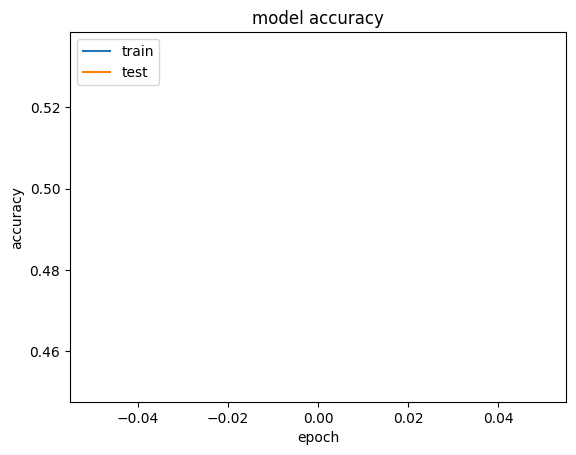

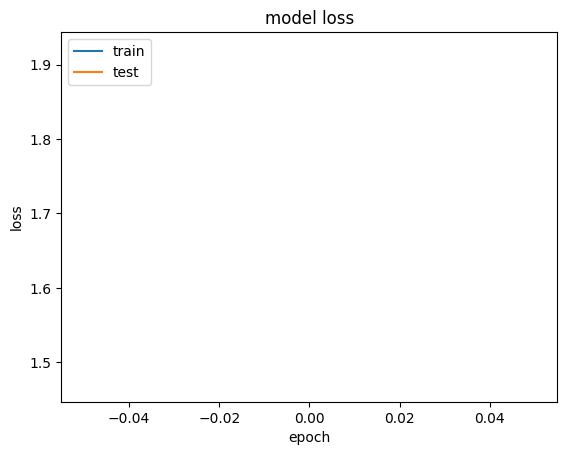

In [13]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step


In [15]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.75      0.71      0.73        21
       Pepper__bell___healthy       0.80      0.55      0.65        22
        Potato___Early_blight       0.95      0.78      0.86        23
             Potato___healthy       0.51      1.00      0.68        22
         Potato___Late_blight       0.80      0.21      0.33        19
        Tomato_Bacterial_spot       0.00      0.00      0.00        18
          Tomato_Early_blight       0.67      0.17      0.27        12
               Tomato_healthy       0.49      0.90      0.63        20
           Tomato_Late_blight       0.75      0.11      0.19        27
             Tomato_Leaf_Mold       0.48      0.50      0.49        20
    Tomato_Septoria_leaf_spot       0.32      0.71      0.44        17
          Tomato__Target_Spot       0.64      0.37      0.47        19
  Tomato__Tomato_mosaic_virus       0.36      0.77      0.49        22

    

c:\Users\rmund\.conda\envs\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rmund\.conda\envs\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rmund\.conda\envs\py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

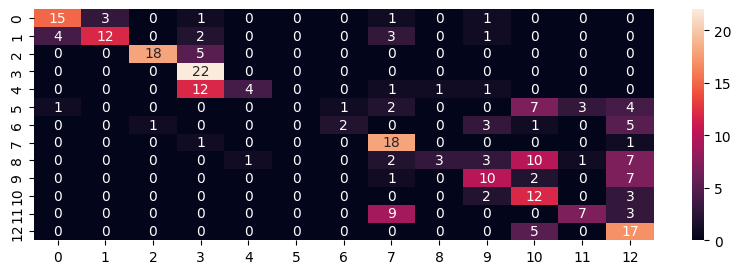

In [17]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [18]:
# Save the model in the Keras format
model.save("model/resnet_classifier.keras")


In [19]:
import os

Processing: testplant/a.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


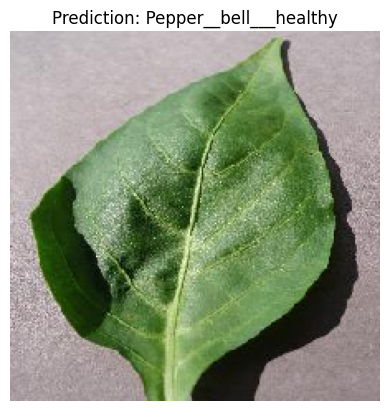

Pepper__bell___healthy Detected in Image
--------------------------------------------------


In [21]:
# 


import os
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('model/resnet_classifier.keras')


# Dictionary for predictions
dict1={0:'Pepper__bell___Bacterial_spot',1:'Pepper__bell___healthy',2:'Potato___Early_blight',3:'Potato___healthy',4:'Potato___Late_blight',5:'Tomato_Bacterial_spot',6:'Tomato_Early_blight',7:'Tomato_Bacterial_spot',8:'Tomato_Early_blight',9:'Tomato_healthy',10:'Tomato_Late_blight',11:'Tomato_Leaf_Mold',12:'Tomato_Septoria_leaf_spot',13:'Tomato__Target_Spot',14:'Tomato__Tomato_mosaic_virus'}


# Directory and image size
directory = "testplant/"
image_size = 224

# Loop through images in the directory
for i in os.listdir(directory):
    path = os.path.join(directory, i)
    print(f"Processing: {path}")
    
    # Load and preprocess the image
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    img_4d = x.reshape(1, image_size, image_size, 3)

    # Predict using the model
    predictions = model.predict(img_4d)
    new_pred = np.argmax(predictions[0])
    a = dict1[new_pred]
    
    # Display the image with matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Prediction: {a}")
    plt.show()

    print(f"{a} Detected in Image")
    print("-" * 50)
